<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Tarea Semanal 2
#### Fernando Coda
  
## Algoritmo para calcular la DFT

Desarrollar un algoritmo que calcule la transformada discreta de Fourier (DFT).

$$\Large
X_{k} = \sum_{n=0}^{N-1}{x_n \cdot e^{-j \cdot 2\pi \cdot \frac{k \cdot n}{N}}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def mi_funcion_sen(vmax, dc, ff, ph, nn, fs):
	end = nn / fs
	tt  = np.linspace(start=0, stop=end, num = nn, endpoint = False)
	xx = vmax * np.sin(2. * np.pi * ff * tt + ph) + dc
	return tt,xx

def mi_funcion_DFT( xx_t ):
	N = len(xx_t)
	XX_f = np.zeros(N)+0j
	for k in range(N):
		omega = 2*np.pi * k / N
		XX_f[k] = sum(xx_t[n] * np.exp(-1j * omega * n) for n in range(N))
	return XX_f

def graficar_espectro_fft(signal):
	df = fs/N
	ff = np.linspace(0, (N-1)*df, N)
	ft_XX = 1/N * np.fft.fft( signal, axis = 0 )
	bfrec = ff <= fs/2
	plt.plot(ff[bfrec], 10* np.log10(2*np.abs(ft_XX[bfrec])**2), \
	          ':', label='Numpy FFT', linewidth=2)

def graficar_espectro_dft(signal):
	df = fs/N
	ff = np.linspace(0, (N-1)*df, N)
	ft_XX = 1/N * mi_funcion_DFT( signal )
	bfrec = ff <= fs/2
	plt.plot(ff[bfrec], 10* np.log10(2*np.abs(ft_XX[bfrec])**2), \
	          '-', label='mi DFT', linewidth=1)

In [2]:

# Defino los parámetros de la simulación
fs = 1000 # Hz
N  = fs  # n° de muestras

delta_f = fs / N # Hz

Ts = 1 / fs # segundos
T_simulacion = N * Ts # segundos


# Defino los parámetros de mi señal
fx = 10 # Hz
Ax = np.sqrt(2) # Volts - la amplitud sqrt(2) me dará una potencia unitaria
offset = 0 # Volts
phase = 0


# Genero mi señal senoidal con los parámetros anteriores
t, x_t  = mi_funcion_sen(Ax, offset, fx, phase, N, fs)


# Genero la señal de ruido
snr_dB = 20 # signal to noise ratio en dB, valor deseado
var_noise  = 10 ** (snr_dB / (-10)) # varianza (potencia) de mi señal de ruido

q = np.sqrt(12 * var_noise)
ruido = np.random.uniform(-q/2, q/2, N)

# Le sumo el ruido a la senoidal
x_t_ruidosa = x_t + ruido

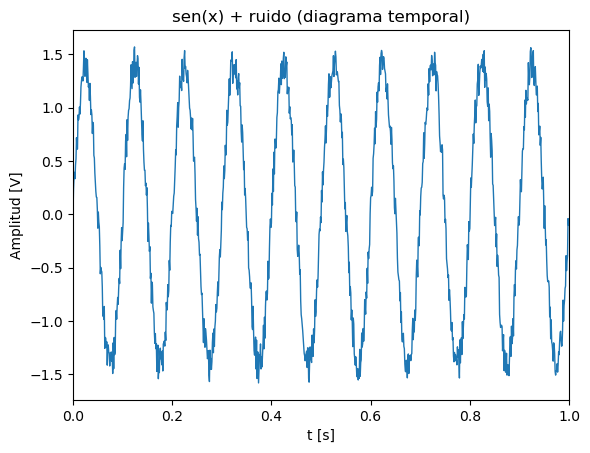

In [3]:
plt.title('sen(x) + ruido (diagrama temporal)')
plt.xlabel('t [s]'), plt.ylabel('Amplitud [V]')
plt.plot(t, x_t_ruidosa, linewidth=1)
plt.xlim([0, T_simulacion])
plt.show()

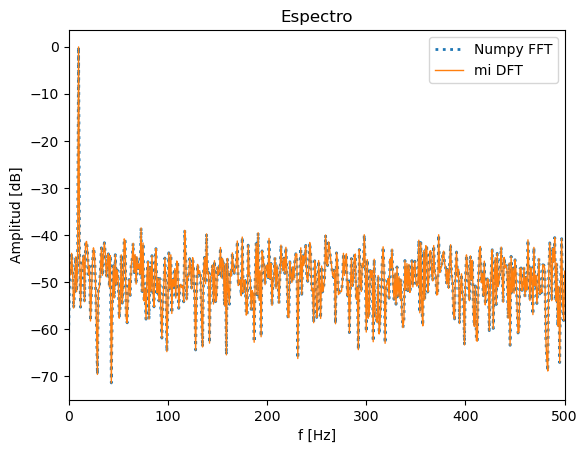

In [4]:
plt.title('Espectro')
plt.xlabel('f [Hz]'), plt.ylabel('Amplitud [dB]')
graficar_espectro_fft(x_t_ruidosa)
graficar_espectro_dft(x_t_ruidosa)
plt.legend()
plt.xlim([0, N/2])
plt.show()

Como se puede apreciar en el anterior gráfico, la transformada de una senoidal de 10 Hz es efectivamente una delta de Kronecker centrada en 10 Hz, con una base de ruido de fondo.  
  
Se verifica también que la función DFT generada produce exactamente el mismo resultado que la FFT de la biblioteca NumPy.